# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [74]:
df = pd.read_csv('台大資訊系統班\grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [5]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

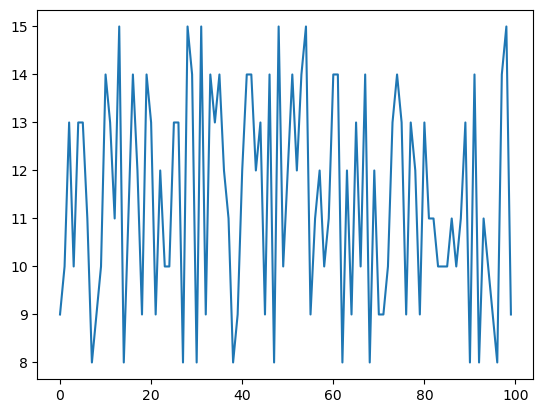

In [11]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

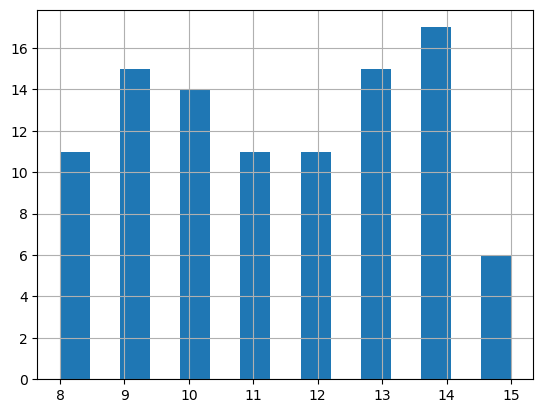

In [12]:
df.國文.hist(bins = 15)

## 3 一些基本的資料分析

算平均。

In [13]:
df.國文.mean()

np.float64(11.39)

算標準差。

In [14]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [15]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [73]:
print(df.dtypes)

國文       int64
英文       int64
數學       int64
自然       int64
社會       int64
總級分      int64
加權     float64
dtype: object


In [70]:
df[['國文', '英文', '數學', '自然', '社會']].corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [17]:
df.國文.corr(df.數學)

np.float64(-0.3108989822179331)

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [89]:
df["總級分"] = df[['國文', '英文', '數學', '自然', '社會']].sum(axis=1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,11.3
1,胡玉華,10,10,10,8,9,47,10.0
2,黃淑婷,13,15,8,11,14,61,12.5
3,陳上紫,10,10,8,9,14,51,9.4
4,崔靜成,13,12,14,12,13,64,12.8


### 【技巧】

有計算的當然也可以的。

In [76]:
df['加權'] = df.國文*0.2 + df.數學*0.3 + df.英文*0.5
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,11.3
1,胡玉華,10,10,10,8,9,47,10.0
2,黃淑婷,13,15,8,11,14,61,12.5
3,陳上紫,10,10,8,9,14,51,9.4
4,崔靜成,13,12,14,12,13,64,12.8


In [77]:
df.sort_values(by = '加權', ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,14.6
57,胡淳茜,12,15,14,13,11,65,14.1
80,施雅鈴,13,15,12,13,13,66,13.7
48,陳怡婷,15,14,12,9,15,65,13.6
83,李士賢,10,14,15,13,13,65,13.5
65,謝雅琳,13,14,13,12,9,61,13.5
36,詹威德,12,13,15,10,14,64,13.4
44,童心怡,13,13,14,8,13,61,13.3
25,蔡亦瑄,13,13,14,13,12,65,13.3
54,陳怡潔,15,15,9,15,11,65,13.2


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [90]:
df2 = df.sort_values(by = ['總級分'], ascending = False).head(10)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
12,李正偉,11,15,11,14,15,66,13.0
80,施雅鈴,13,15,12,13,13,66,13.7
37,曾怡君,11,12,15,13,14,65,12.7
25,蔡亦瑄,13,13,14,13,12,65,13.3
54,陳怡潔,15,15,9,15,11,65,13.2
83,李士賢,10,14,15,13,13,65,13.5
87,趙偉希,10,13,14,13,15,65,12.7
64,俞志峰,9,14,13,14,15,65,12.7
48,陳怡婷,15,14,12,9,15,65,13.6
57,胡淳茜,12,15,14,13,11,65,14.1


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [82]:
df2 = df.sort_values(by = ['加權','總級分'], ascending = False)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,14.6
57,胡淳茜,12,15,14,13,11,65,14.1
80,施雅鈴,13,15,12,13,13,66,13.7
48,陳怡婷,15,14,12,9,15,65,13.6
83,李士賢,10,14,15,13,13,65,13.5
...,...,...,...,...,...,...,...,...
21,黃奕霞,9,8,11,13,8,49,9.1
7,林金鳳,8,9,10,10,8,45,9.1
84,胡凱琳,10,8,9,9,15,51,8.7
18,梁慧君,9,8,8,8,12,45,8.2


### 【重點】重設 index

In [83]:
df2.index = range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,14.6
2,胡淳茜,12,15,14,13,11,65,14.1
3,施雅鈴,13,15,12,13,13,66,13.7
4,陳怡婷,15,14,12,9,15,65,13.6
5,李士賢,10,14,15,13,13,65,13.5


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [84]:
df2[df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,14.6
5,李士賢,10,14,15,13,13,65,13.5
7,詹威德,12,13,15,10,14,64,13.4
17,葉儀依,9,13,15,8,14,59,12.8
19,曾怡君,11,12,15,13,14,65,12.7
27,陳竹伯,10,12,15,10,14,61,12.5
31,周育霖,9,12,15,13,12,61,12.3
40,張雅彬,10,11,15,12,8,56,12.0
42,林哲法,14,9,15,10,14,62,11.8
49,芮秋辛,11,10,15,10,8,54,11.7


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [85]:
df2[(df2['數學'] == 15) & (df2['英文'] == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,14.6


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [86]:
df2 = df2.drop('總級分',axis = 1)
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,14.6
2,胡淳茜,12,15,14,13,11,14.1
3,施雅鈴,13,15,12,13,13,13.7
4,陳怡婷,15,14,12,9,15,13.6
5,李士賢,10,14,15,13,13,13.5


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [91]:
df2.drop('總級分',axis = 1,inplace = True)
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
12,李正偉,11,15,11,14,15,13.0
80,施雅鈴,13,15,12,13,13,13.7
37,曾怡君,11,12,15,13,14,12.7
25,蔡亦瑄,13,13,14,13,12,13.3
54,陳怡潔,15,15,9,15,11,13.2


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [99]:
df.drop(5).head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,胡玉華,10,10,10,8,9,47,10.0
2,黃淑婷,13,15,8,11,14,61,12.5
3,陳上紫,10,10,8,9,14,51,9.4
4,崔靜成,13,12,14,12,13,64,12.8
6,梁俊翔,11,13,10,10,14,58,11.7


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [101]:
df = df.drop(df[df['姓名'] == '胡玉華'].index)
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
2,黃淑婷,13,15,8,11,14,61,12.5
3,陳上紫,10,10,8,9,14,51,9.4
4,崔靜成,13,12,14,12,13,64,12.8
5,張雅岳,13,12,12,12,8,57,12.2
6,梁俊翔,11,13,10,10,14,58,11.7
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,9.5
96,吳筱婷,8,10,14,10,15,57,10.8
97,陳家銘,14,9,11,8,12,54,10.6
98,李明威,15,9,8,9,15,56,9.9


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [109]:
conda install pandas-datareader

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [111]:
conda update pandas-datareader

Jupyter detected...
Note: you may need to restart the kernel to use updated packages.

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\python

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.0.17             |       h35632f6_0         7.8 MB
    ucrt-10.0.22621.0          |       haa95532_0         620 KB
    vc14_runtime-14.44.35208   |      h4927774_10         825 KB
    vs2015_runtime-14.44.35208 |      ha6b5a95_10          19 KB
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following NEW packages will be INSTALLED:

  ucrt               pkgs/main/win-64::ucrt-10.0.22621.0-haa95532_0 
  vc14_runtime       pkgs/main/win-64::vc14_runtime-14

In [114]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 2.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
#無法使用pdr獲取資料，所以嘗試了yfinance

import pandas_datareader as pdr
import yfinance as yf

# 獲取 AAPL 的資料
df = yf.download('AAPL', start='2020-01-01', end='2021-12-31')
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.620834   72.681281   71.373211   71.627084  135480400
2020-01-03   71.914818   72.676447   71.689957   71.847118  146322800
2020-01-06   72.487854   72.526541   70.783256   71.034717  118387200
2020-01-07   72.146950   72.753831   71.926922   72.497537  108872000
2020-01-08   73.307510   73.609745   71.849533   71.849533  132079200
...                ...         ...         ...         ...        ...
2021-12-23  173.021576  173.581047  172.030251  172.599531   68356600
2021-12-27  176.996704  177.085037  173.796969  173.816588   74919600
2021-12-28  175.975922  177.978222  175.229975  176.829850   79144300
2021-12-29  176.064316  177.291211  174.847231  176.015237   62348900
2021-12-30  174.906082  177.232284  174.798115  176.152611   59773000

[504 rows x 5 colum

In [ ]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
#df = pd.read_csv('data/aapl.csv', index_col="Date")

In [118]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


#### 只要最後 300 個交易日!

In [123]:
df = df[-300:]
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-10-22,112.719879,114.949932,111.590242,114.375373,101988000
2020-10-23,112.028450,113.498923,111.288343,113.343108,82572600
2020-10-26,112.038200,113.498933,109.925001,111.025425,111850700
2020-10-27,113.547615,114.209814,111.541545,112.466672,92276800
2020-10-28,108.288979,112.408248,108.191598,112.038198,143937800
...,...,...,...,...,...
2021-12-23,173.021576,173.581047,172.030251,172.599531,68356600
2021-12-27,176.996704,177.085037,173.796969,173.816588,74919600


#### 20 日的移動平均

<Axes: xlabel='Date'>

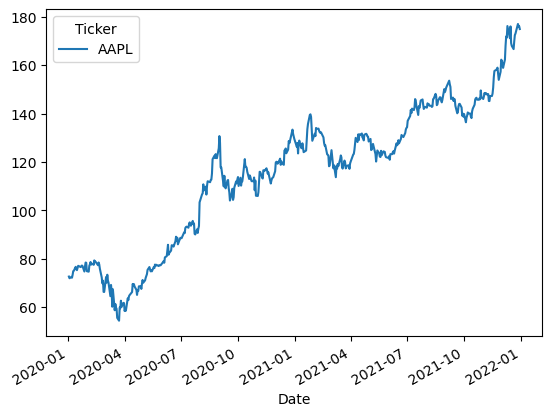

In [120]:
df.Close.plot()

<Axes: xlabel='Date'>

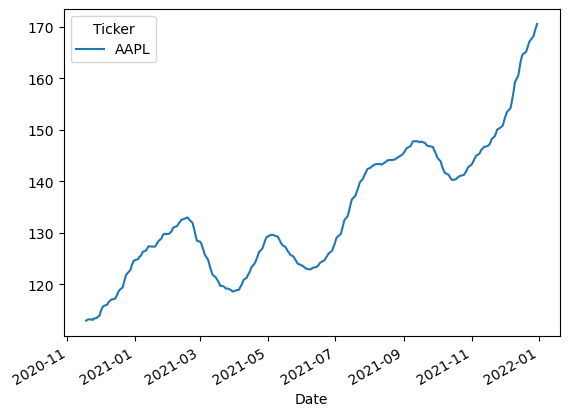

In [124]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

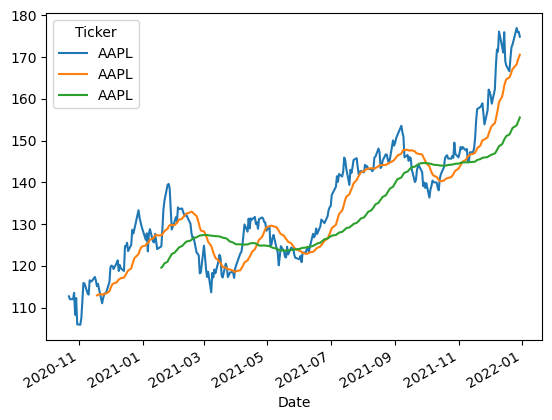

In [132]:
ax = df.Close.plot(legend=True, label = 'close')
df.Close.rolling(20).mean().plot(ax=ax, label="$MA_{20}$", legend=True)
df.Close.rolling(60).mean().plot(ax=ax, label="$MA_{60}$", legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [135]:
close = df.Close.values
len(close)

300

In [136]:
x = close[:-1]
len(x)

299

In [137]:
y = close[1:]
len(y)

299

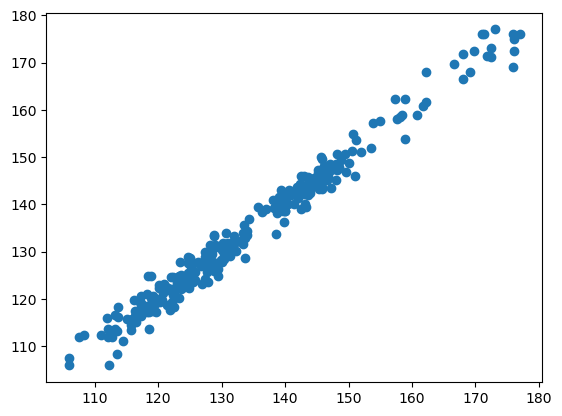

In [138]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [139]:
mydata = np.random.randn(4,3)

In [140]:
mydata

array([[-0.65844419, -0.82900768,  2.82786373],
       [-1.44923003, -1.2972087 ,  0.71013116],
       [-1.18242057,  1.30768086,  0.70164359],
       [-1.1116934 ,  0.94987303, -0.20466102]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [141]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [142]:
df2

,A,B,C
0,-0.658444,-0.829008,2.827864
1,-1.449230,-1.297209,0.710131
2,-1.182421,1.307681,0.701644
3,-1.111693,0.949873,-0.204661


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [144]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [145]:
df3

,A,B,C
0,1.149938,-0.267242,2.970077
1,-1.072937,0.875486,0.288725
2,0.264182,-1.660967,0.693692


In [146]:
df4 = pd.concat([df2,df3], axis = 0)

In [147]:
df4

,A,B,C
0,-0.658444,-0.829008,2.827864
1,-1.449230,-1.297209,0.710131
2,-1.182421,1.307681,0.701644
3,-1.111693,0.949873,-0.204661
0,1.149938,-0.267242,2.970077
1,-1.072937,0.875486,0.288725
2,0.264182,-1.660967,0.693692


前面我們弄得亂七八糟的 index 重設一下。

In [148]:
df4.index = range(7)

In [149]:
df4

,A,B,C
0,-0.658444,-0.829008,2.827864
1,-1.449230,-1.297209,0.710131
2,-1.182421,1.307681,0.701644
3,-1.111693,0.949873,-0.204661
4,1.149938,-0.267242,2.970077
5,-1.072937,0.875486,0.288725
6,0.264182,-1.660967,0.693692


#### 横向的貼

In [150]:
df5 = pd.concat([df2,df3], axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [151]:
df5

,A,B,C,A,B,C
0,-0.658444,-0.829008,2.827864,1.149938,-0.267242,2.970077
1,-1.449230,-1.297209,0.710131,-1.072937,0.875486,0.288725
2,-1.182421,1.307681,0.701644,0.264182,-1.660967,0.693692
3,-1.111693,0.949873,-0.204661,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [161]:
df_names = pd.read_csv('台大資訊系統班/names.csv', names = ['姓名'])
df_grades = pd.read_csv('台大資訊系統班/grade2.csv')

In [156]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [157]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [158]:
df_grades.to_csv('台大資訊系統班/grade2.csv',index = 0)

In [162]:
df_grades

,國文,英文,數學,社會,自然
0,9,10,11,8,13
1,6,13,10,13,13
2,15,10,6,9,15
3,10,7,6,10,8
4,13,6,6,8,10
...,...,...,...,...,...
95,7,15,7,11,11
96,12,10,10,15,14
97,14,8,9,9,10
98,9,6,6,11,12


In [163]:
df_score = pd.concat([df_names,df_grades],axis = 1)

In [164]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,9,10,11,8,13
1,王紹尹,6,13,10,13,13
2,黃季坤,15,10,6,9,15
3,許正書,10,7,6,10,8
4,張鈞蓮,13,6,6,8,10
...,...,...,...,...,...,...
95,陳君生,7,15,7,11,11
96,曾桂甫,12,10,10,15,14
97,林欣怡,14,8,9,9,10
98,林佳霖,9,6,6,11,12
